# An overview of Deep Learning models

In this document, I present a high-level overview of common Deep-Learning models. The word 'model' does not imply a specific approach to prediction. Rather, it is used to indicate a particular configuration for network units. In that sense, 'model' is closer to 'architecture' or 'set-up.'  
### Basic Feedforward Network used for Word2Vec generation ###
We've already reviewed Word2Vec extensively, but here's a brief recap. Below is a schema for the standard single-hidden-layer **CBOW** model. Errors are often calculated as the KL divergence between predicted and observed y values, and backpropagated through the layers.

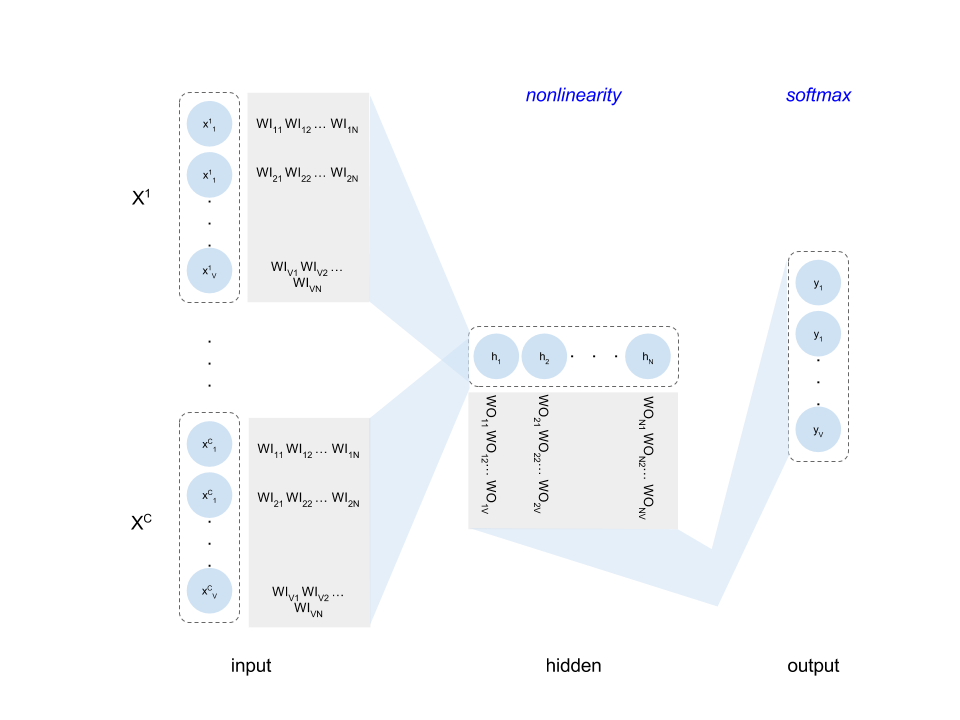

In [1]:
from IPython.display import Image
Image(filename='images/word2vec.png')

### Recursive Neural Network###
Suppose you need to train a network to classify sentences for their sentiment. You can potentially train word2vec on individual words, then try to use some composition functions to guess the sentiment of the sentences based on the aggregation of word vectors. This does not yield very good results, since sentiment is a subtle concept and often depends on complicated features such as ordering, negation, etc. Moreover the syntactic relationship between words often plays a big role in sentiment.

Suppose you have the binary syntax tree of a sentence and would like to use it to predict its sentiment. One possible way is to use Recursive NNs. Recursive NNs simply traverse the syntax tree of the sentence in a recursive manner. At each node in the tree, the network calculates two values: the predicted sentiment of that node (using a softmax classifier), and the 'carry-over' value of the node (using a non-linearity function). The image below demonstrates this process for the simple phrase: *not very good.*

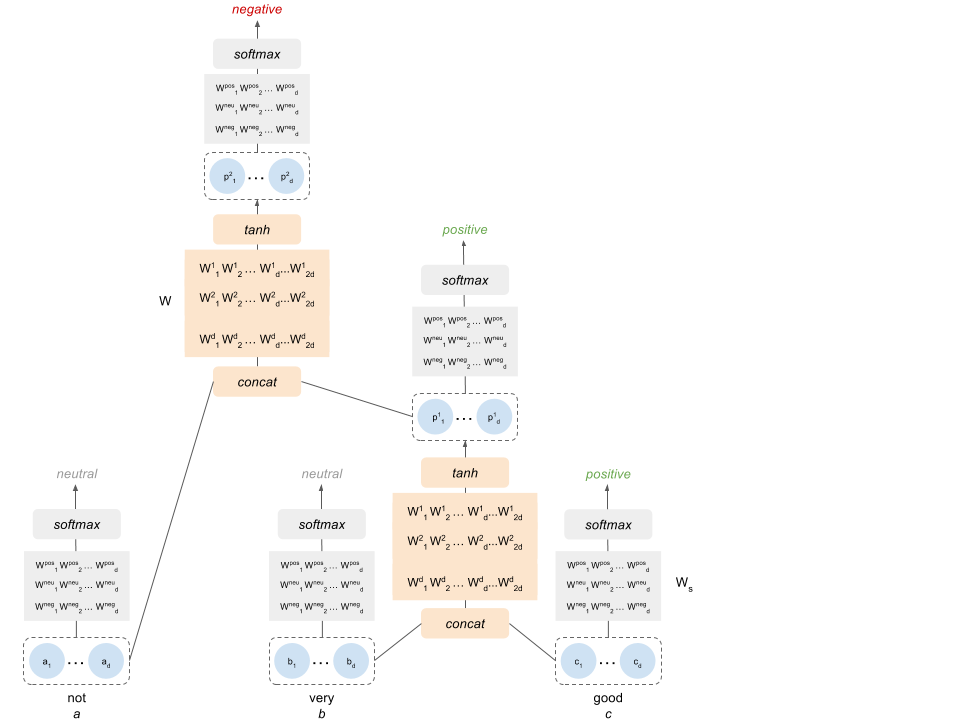

In [2]:
Image(filename='images/recnn.png')

A problem with vanilla RecNNs is that they apply a non-linearity at every level of recursion. But sometimes the relationship between adjacent words is a very simple one, for instane 'very good' is the same as 'good,' but with a stronger emphasis on sentiment, or 'not good' is the same as 'good,' but with the sentiment reversed. To capture these linear relationships, we can use **Matrix-Vector RecNNs (MV-RecNNs)**. In these networds, each node is represented by two indicators:

* A d-dimenstional vector, as before.
* A dxd dimensional matrix, which captures the relationship between the vector of the given word, and the vector of its adjacent word.

The image below illustrates how the network operates in this mode.

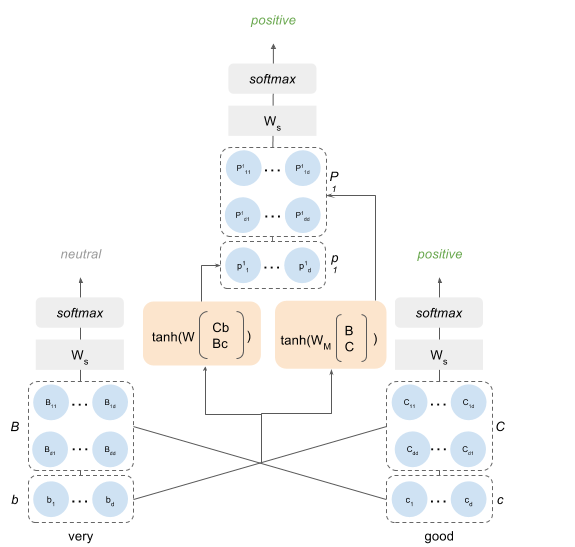

In [3]:
Image(filename='images/mvrecnn.png')

The main disadvantage of MV-RecNN is the enormity of the number of its parameters. Each word has to learn a d-dimensional vector as well as a dxd-dimensional matrix, which requires very large amounts of training data to converge properly. 

A possible way to address this problem is to reduce the number of parameters by representing linear intra-word relationships with one global matrix. To do this, we define a Tensor of order 3, with dimensions 2dx2dxd. This tensor captures the relationships between all pairs of words in the training set. This model is known as a **Recursive Neural Tensor Network (RNTN)**. 

In this network, the words are presented using d-dimensional vectors as before, but recursive non-linearity is applied as follows:
$$p^1=tanh(\begin{bmatrix}b\\c\end{bmatrix}^TV^{[1:d]}\begin{bmatrix}b\\c\end{bmatrix}+W\begin{bmatrix}b\\c\end{bmatrix}),$$
$$p^2=tanh(\begin{bmatrix}a\\p^1\end{bmatrix}^TV^{[1:d]}\begin{bmatrix}a\\p^1\end{bmatrix}+W\begin{bmatrix}a\\p^1\end{bmatrix})$$

where $V$ is the tensor. The figure below shows how the vector for $p^1$ will be calculated.

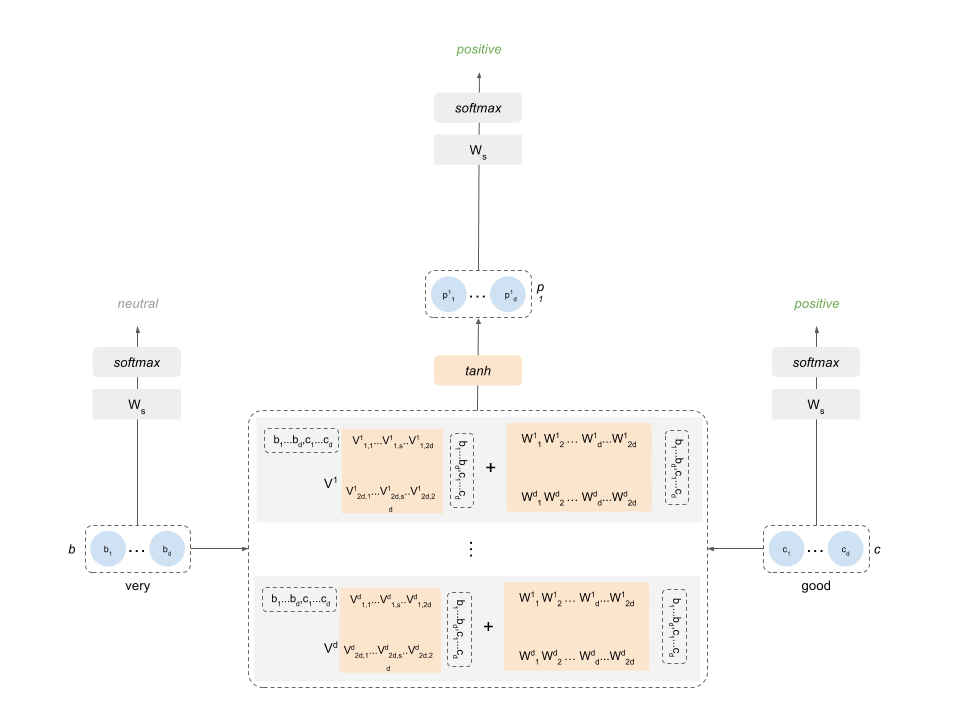

In [5]:
Image(filename='images/rntn.png')